# Housing Project

## HOUSING: PRICE PREDICTION

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

## Importing required packages


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## Importing Data & EDA


#### Using the ‘read_csv’ function provided by the Pandas package, we can import the data into our python environment. After importing the data, we can use the ‘head’ function to get a glimpse of our dataset.

In [2]:
# load both "train" and "test" dataset:

df_train = pd.read_csv("E:\project flip robo\Project-Housing_splitted\housing_train.csv")
df_test = pd.read_csv("E:\project flip robo\Project-Housing_splitted\housing_test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [6]:
print("Train Data:", df_train.shape)
print("Test Data:", df_test.shape)

Train Data: (1168, 81)
Test Data: (292, 80)


In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [11]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [14]:
df_train.isnull().sum()/df_train.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

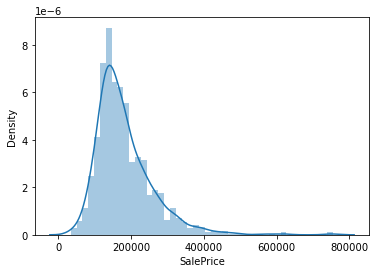

In [19]:
sns.distplot(df_train['SalePrice'])

## Fill the missing values for both "Traning" and "Test" dataset

In [20]:
# Fill the columns with mean as its continous data

df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(), inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)

In [21]:
# Fill the columns with mode as its categorical data

df_train["MasVnrType"].fillna(df_train["MasVnrType"].value_counts().index[0], inplace=True)
df_train["BsmtQual"].fillna(df_train["BsmtQual"].value_counts().index[0], inplace=True)
df_train["BsmtCond"].fillna(df_train["BsmtCond"].value_counts().index[0], inplace=True)
df_train["BsmtExposure"].fillna(df_train["BsmtExposure"].value_counts().index[0], inplace=True)
df_train["BsmtFinType1"].fillna(df_train["BsmtFinType1"].value_counts().index[0], inplace=True)
df_train["BsmtFinType2"].fillna(df_train["BsmtFinType2"].value_counts().index[0], inplace=True)
df_train["FireplaceQu"].fillna(df_train["FireplaceQu"].value_counts().index[0], inplace=True)
df_train["GarageType"].fillna(df_train["GarageType"].value_counts().index[0], inplace=True)
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].value_counts().index[0], inplace=True)
df_train["GarageFinish"].fillna(df_train["GarageFinish"].value_counts().index[0], inplace=True)
df_train["GarageQual"].fillna(df_train["GarageQual"].value_counts().index[0], inplace=True)
df_train["GarageCond"].fillna(df_train["GarageCond"].value_counts().index[0], inplace=True)

#### Drop the column:

In [22]:
df_train.drop(columns = ["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)
df_test.drop(columns = ["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

## Data Visualization


#### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

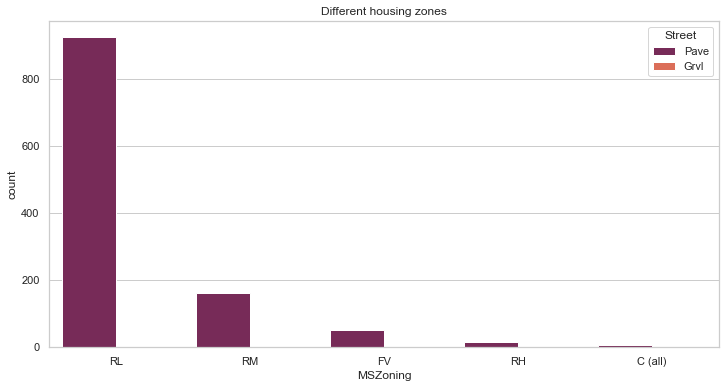

In [26]:
# Plot below can identify the zoning area of the properties / apartments that are up for sale.

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("MSZoning", data=df_train, hue= "Street", palette="rocket").set(title='Different housing zones') 
plt.show()

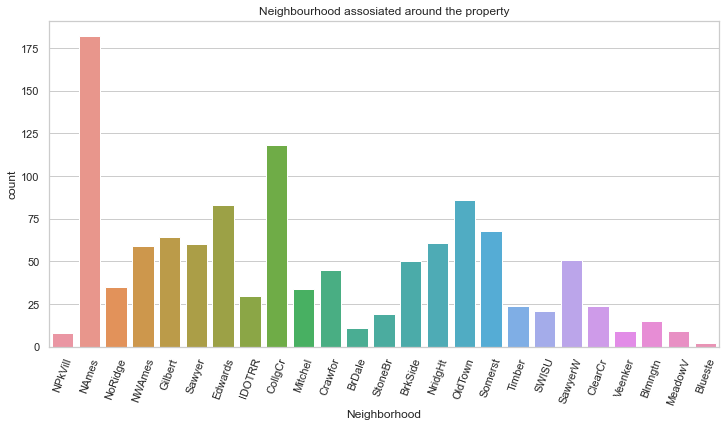

In [27]:
# Plot gives idea on the locality of neughbourhood 

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Neighborhood", data=df_train).set(title='Neighbourhood assosiated around the property') 
plt.xticks(rotation=70)
plt.show()

#### SaleType: Type of sale

       WD    Warranty Deed - Conventional
       CWD   Warranty Deed - Cash
       VWD   Warranty Deed - VA Loan
       New   Home just constructed and sold
       COD   Court Officer Deed/Estate
       Con   Contract 15% Down payment regular terms
       ConLw Contract Low Down payment and low interest
       ConLI Contract Low Interest
       ConLD Contract Low Down
       Oth   Other

### Let's observe is any relation between sales price of the properties over the years.

### A such a downpayment is possible if the person looking forward to purchase has a steady income. Higher the downpayment, better the loan rates and since cost of living is so important. This could be an ideal option for people who cannot afford or do not wish to spend all at once.

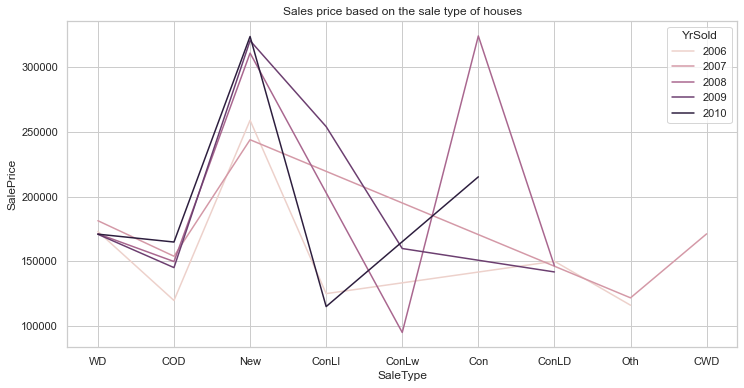

In [30]:
# Relation between SaleType and SalePrice.

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_train, x="SaleType", y="SalePrice", hue = "YrSold", ci=None).set(title='Sales price based on the sale type of houses')
plt.show()

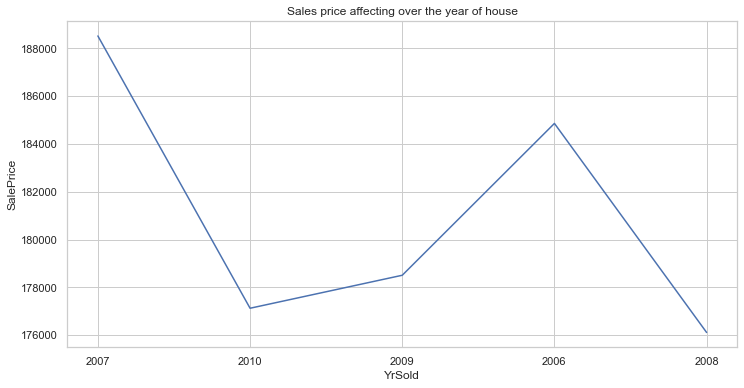

In [31]:
# Plot shows us the years when properties were sold the highest.

year_new = df_train['YrSold'].astype(str)

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_train, x=year_new, y="SalePrice", ci=None).set(title='Sales price affecting over the year of house')
plt.show()

### SaleCondition: Condition of sale

        Normal Normal Sale
        Abnorml Abnormal Sale -  trade, foreclosure, short sale
        AdjLand Adjoining Land Purchase
        Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit	
        Family Sale between family members
        Partial Home was not completed when last assessed (associated with New Homes)

### Plot below show thoughtout years only "Normal sales" houses were bought compared to already existing.

This is a clear indication that when a person get's on a market price withoiut middleman or brokers customers tend to get direct and better deals thus saving money to some extent.

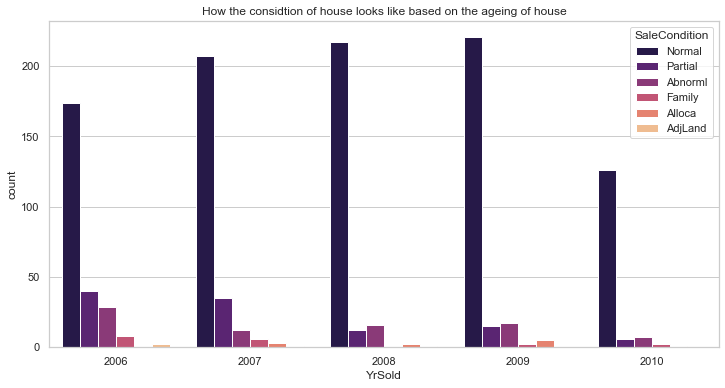

In [32]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("YrSold", data=df_train, palette= "magma", 
                   hue="SaleCondition").set(title='How the considtion of house looks like based on the ageing of house') 
plt.show()

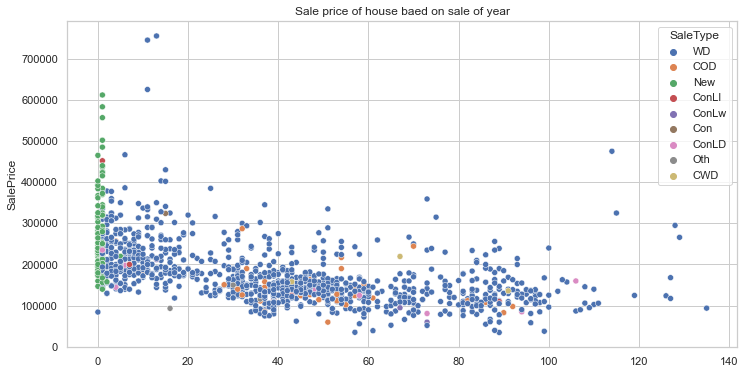

In [33]:
# It appears Warranty Deed seems to be the most sought after payment or purchasing method ,it's clearly in favour of both the parties as and when the duration of built year and sale year increases.

gap_of_sale = df_train["YrSold"] - df_train["YearBuilt"]

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_train, x=gap_of_sale, 
                y="SalePrice", hue="SaleType").set(title='Sale price of house baed on sale of year')
plt.show()

### SaleCondition: Condition of sale

        Normal   Normal Sale
        Abnorml  Abnormal Sale -  trade, foreclosure, short sale
        AdjLand  Adjoining Land Purchase
        Alloca	Allocation   two linked properties with separate deeds, typically condo with a garage unit	
        Family   Sale between family members
        Partial  Home was not completed when last assessed (associated with New Homes)

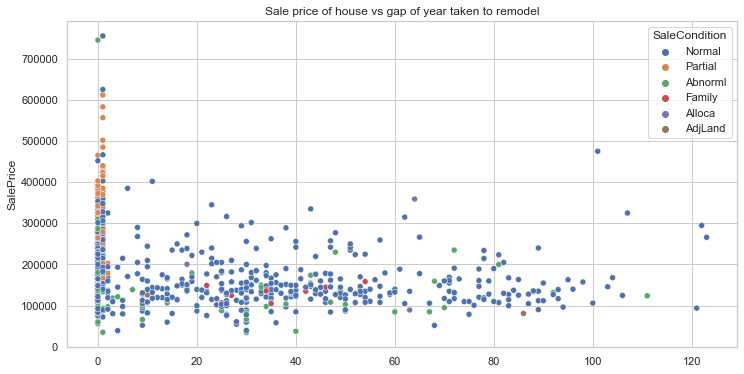

In [34]:
# Below plot shows number of years taken to remodel doesn't realy seem to affect the sale type.

gap_of_model = df_train["YearRemodAdd"] - df_train["YearBuilt"]

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_train, x=gap_of_model, 
                y="SalePrice", hue="SaleCondition").set(title='Sale price of house vs gap of year taken to remodel')
plt.show()

#### Condition1: Proximity to various conditions

        Artery	Adjacent to arterial street
        Feedr	Adjacent to feeder street	
        Norm	Normal	
        RRNn	Within 200' of North-South Railroad
        RRAn	Adjacent to North-South Railroad
        PosN	Near positive off-site feature--park, greenbelt, etc.
        PosA	Adjacent to postive off-site feature
        RRNe	Within 200' of East-West Railroad
        RRAe	Adjacent to East-West Railroad

#### We can see that the roadways or streets seems to play an important role.Houses / properties that are in neighborhoods, condos, villa's etc fetch good amount of values and if it was remodelled or partially completed it seems to get even higher sale to some extent.


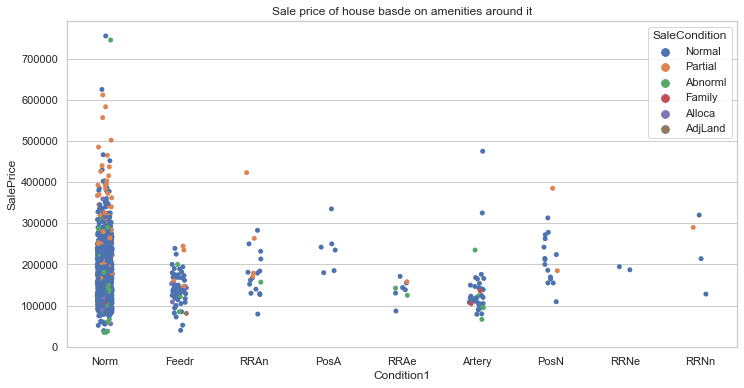

In [35]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.stripplot(data=df_train, x="Condition1", 
                y="SalePrice", hue="SaleCondition").set(title='Sale price of house basde on amenities around it')
plt.show()

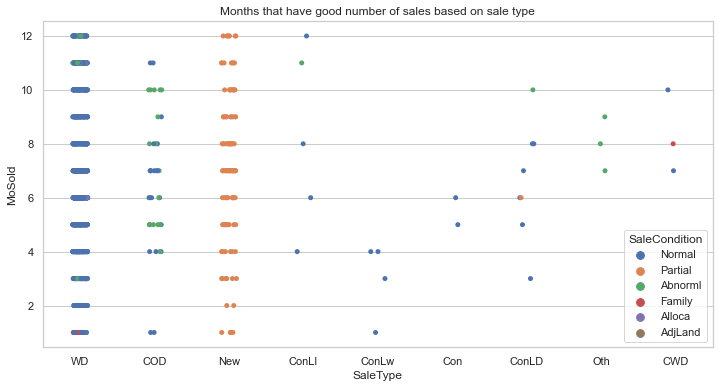

In [36]:
# Below plot shows "Waranty Deed" and "New" are favourable throughout the year :

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.stripplot(data=df_train, x="SaleType", 
                y="MoSold", hue="SaleCondition").set(title='Months that have good number of sales based on sale type')
plt.show()

Text(0.5, 1.0, 'Sale Price Distribution')

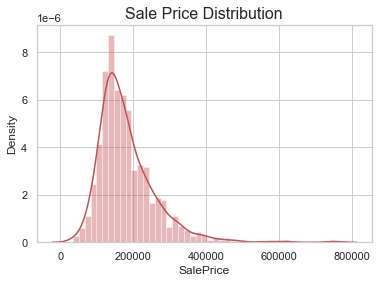

In [42]:
sns.distplot(df_train['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)

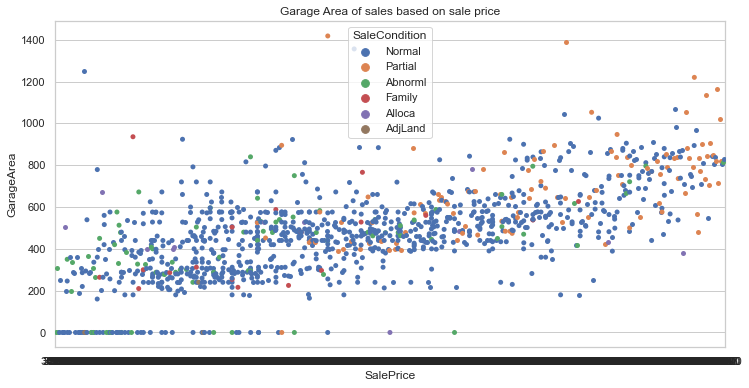

In [43]:
# GarageArea: Size of garage in square feet with respect to Sale Price.

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.stripplot(data=df_train, x="SalePrice", 
                y="GarageArea",  hue="SaleCondition").set(title='Garage Area of sales based on sale price')
plt.show()

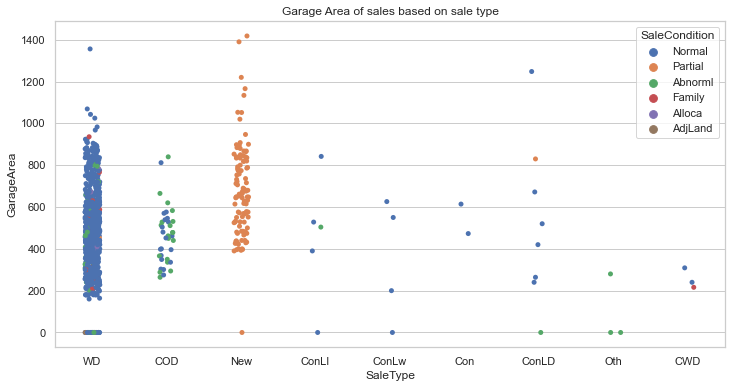

In [44]:
# GarageArea: Size of garage in square feet with respect to saleType

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.stripplot(data=df_train, x="SaleType", 
                y="GarageArea", hue="SaleCondition").set(title='Garage Area of sales based on sale type')
plt.show()

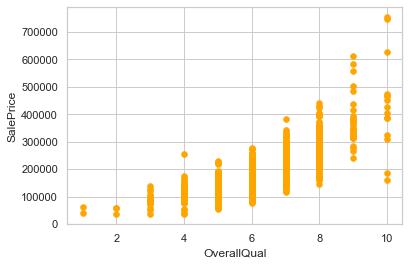

In [50]:
# OverallQual: Rates the overall material and finish of the house

plt.scatter(x=df_train['OverallQual'], y=df_train['SalePrice'], 
            color="orange", linewidths=0.5);
plt.xlabel("OverallQual"); plt.ylabel("SalePrice");

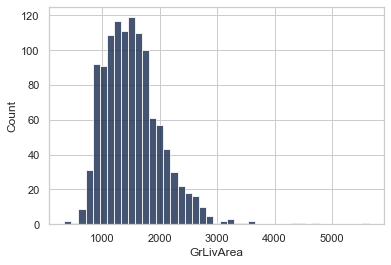

In [59]:
# Gr Liv Area which represents the living area above ground.

sns.distplot(df_train['GrLivArea'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

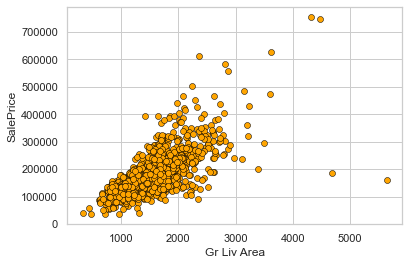

In [61]:
# The above-ground living area falls approximately between 800 and 1800 ft2

# Relationship between GrLivArea and SalePrice

plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

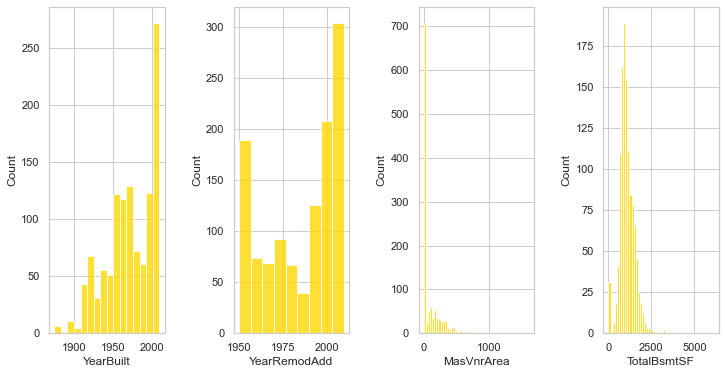

In [68]:
#  Relationship between the target variable and the variables that are positively correlated with it.

fig, axes = plt.subplots(1, 4, figsize=(12,6))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["YearBuilt", "YearRemodAdd", 
                             "MasVnrArea", "TotalBsmtSF"]):
    sns.distplot(df_train[v], kde=False, color= 'Gold', 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

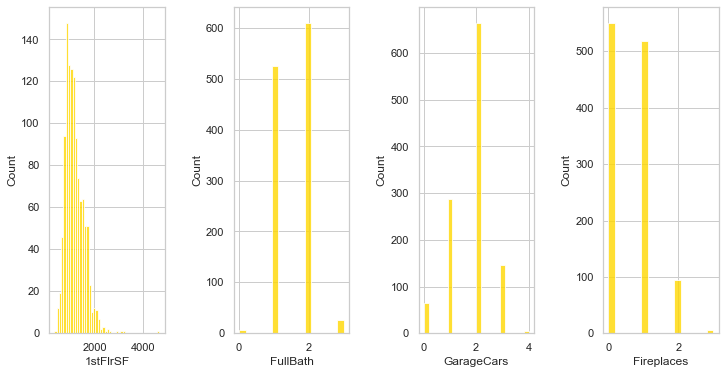

In [76]:
fig, axes = plt.subplots(1, 4, figsize=(12,6))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1stFlrSF", "FullBath",
                             "GarageCars", "Fireplaces"]):
    sns.distplot(df_train[v], kde=False, color= 'Gold', 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

### Feature Engineering

In [79]:
# Rating 

mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
df_train['ExterQual'] = df_train['ExterQual'].map(mp)
df_train['ExterCond'] = df_train['ExterCond'].map(mp)
df_train['HeatingQC'] = df_train['HeatingQC'].map(mp)
df_train['KitchenQual'] = df_train['KitchenQual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
df_train['BsmtQual'] = df_train['BsmtQual'].map(mp)
df_train['BsmtCond'] = df_train['BsmtCond'].map(mp)
df_train['BsmtExposure'] = df_train['BsmtExposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map(mp)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map(mp)

df_train['CentralAir'] = df_train['CentralAir'].map({'Y':1,'N':0})
df_train['Functional'] = df_train['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})

df_train['FireplaceQu'] = df_train['FireplaceQu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

df_train['GarageFinish'] = df_train['GarageFinish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})

df_train['GarageQual'] = df_train['GarageQual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})

df_train['GarageCond'] = df_train['GarageCond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})


df_train['LandSlope'] = df_train['LandSlope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})

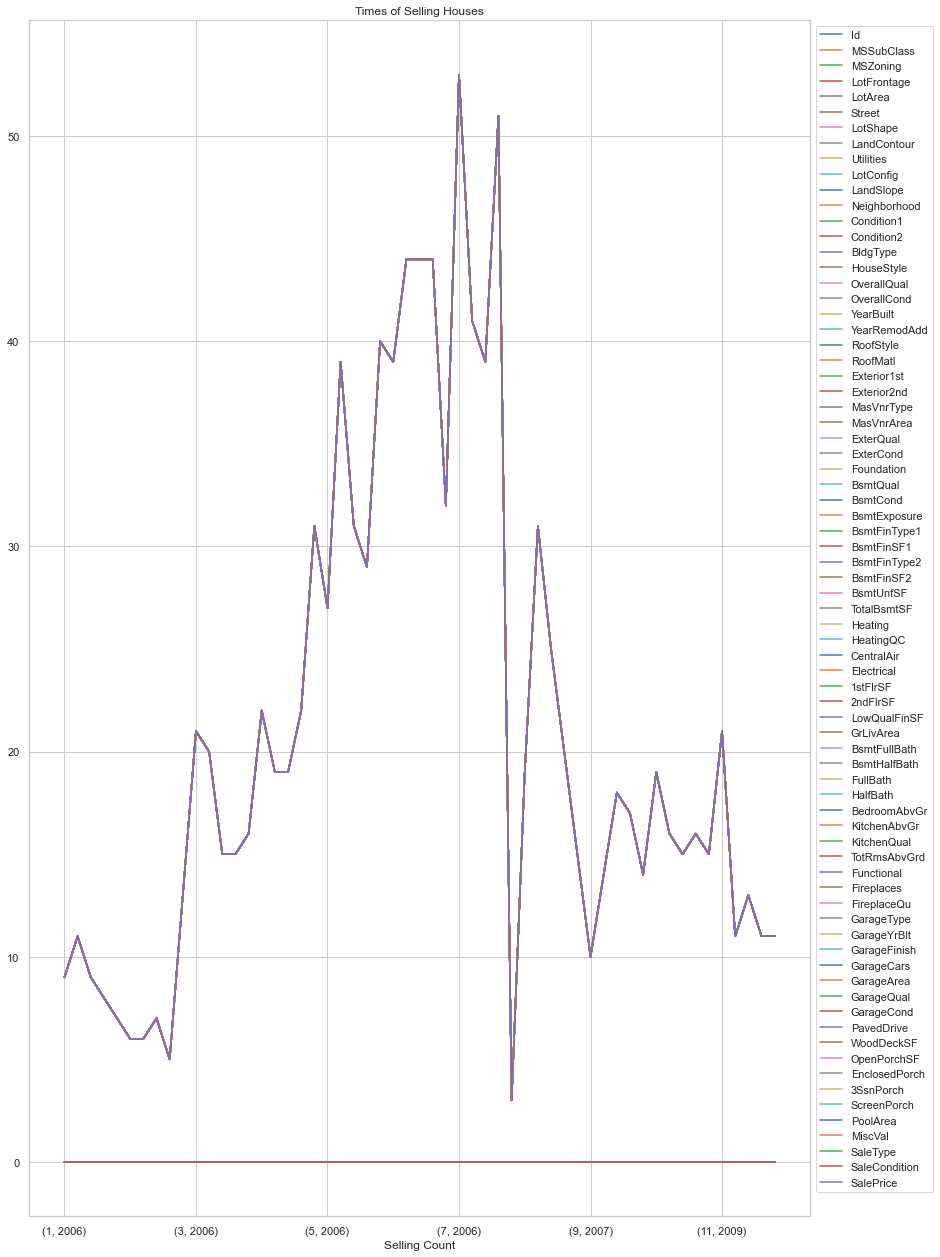

In [87]:
# Plot realised that most of the houses where sold in the summer months 6 and 7


df_train.groupby(['MoSold','YrSold']).count().plot(kind='line',figsize=(14,22))
plt.xlabel('Selling Count')
plt.title('Times of Selling Houses')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Enocing :

In [45]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [92]:
# Using LabelEncoder:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [93]:
# Encode the training dataset

df_train.MSZoning = encoder.fit_transform(df_train.MSZoning)
df_train.Street = encoder.fit_transform(df_train.Street)
df_train.LotShape = encoder.fit_transform(df_train.LotShape)
df_train.LandContour = encoder.fit_transform(df_train.LandContour)
df_train.Utilities = encoder.fit_transform(df_train.Utilities)
df_train.LotConfig = encoder.fit_transform(df_train.LotConfig)
df_train.LandSlope = encoder.fit_transform(df_train.LandSlope)
df_train.Neighborhood = encoder.fit_transform(df_train.Neighborhood)
df_train.Condition1 = encoder.fit_transform(df_train.Condition1)
df_train.Condition2 = encoder.fit_transform(df_train.Condition2)
df_train.BldgType = encoder.fit_transform(df_train.BldgType)
df_train.HouseStyle = encoder.fit_transform(df_train.HouseStyle)
df_train.RoofStyle = encoder.fit_transform(df_train.RoofStyle)
df_train.RoofMatl = encoder.fit_transform(df_train.RoofMatl)
df_train.Exterior1st = encoder.fit_transform(df_train.Exterior1st)
df_train.Exterior2nd = encoder.fit_transform(df_train.Exterior2nd)
df_train.MasVnrType = encoder.fit_transform(df_train.MasVnrType)
df_train.ExterQual = encoder.fit_transform(df_train.ExterQual)
df_train.ExterCond = encoder.fit_transform(df_train.ExterCond)
df_train.Foundation = encoder.fit_transform(df_train.Foundation)
df_train.BsmtQual = encoder.fit_transform(df_train.BsmtQual)
df_train.BsmtCond = encoder.fit_transform(df_train.BsmtCond)
df_train.BsmtExposure = encoder.fit_transform(df_train.BsmtExposure)
df_train.BsmtFinType1 = encoder.fit_transform(df_train.BsmtFinType1)
df_train.BsmtFinType2 = encoder.fit_transform(df_train.BsmtFinType2)
df_train.Heating = encoder.fit_transform(df_train.Heating)
df_train.HeatingQC = encoder.fit_transform(df_train.HeatingQC)
df_train.CentralAir = encoder.fit_transform(df_train.CentralAir)
df_train.Electrical = encoder.fit_transform(df_train.Electrical)
df_train.KitchenQual = encoder.fit_transform(df_train.KitchenQual)
df_train.Functional = encoder.fit_transform(df_train.Functional)
df_train.FireplaceQu = encoder.fit_transform(df_train.FireplaceQu)
df_train.GarageType = encoder.fit_transform(df_train.GarageType)
df_train.GarageFinish = encoder.fit_transform(df_train.GarageFinish)
df_train.GarageQual = encoder.fit_transform(df_train.GarageQual)
df_train.GarageCond = encoder.fit_transform(df_train.GarageCond)
df_train.SaleType = encoder.fit_transform(df_train.SaleType)
df_train.SaleCondition = encoder.fit_transform(df_train.SaleCondition)
df_train.PavedDrive = encoder.fit_transform(df_train.PavedDrive)

In [94]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,1,0,3,0,4,...,0,0,0,0,0,2,2007,8,4,128000
1,889,20,3,95.00000,15865,1,0,3,0,4,...,0,0,224,0,0,10,2007,8,4,268000
2,793,60,3,92.00000,9920,1,0,3,0,1,...,0,0,0,0,0,6,2007,8,4,269790
3,110,20,3,105.00000,11751,1,0,3,0,4,...,0,0,0,0,0,1,2010,0,4,190000
4,422,20,3,70.98847,16635,1,0,3,0,2,...,0,0,0,0,0,6,2009,8,4,215000


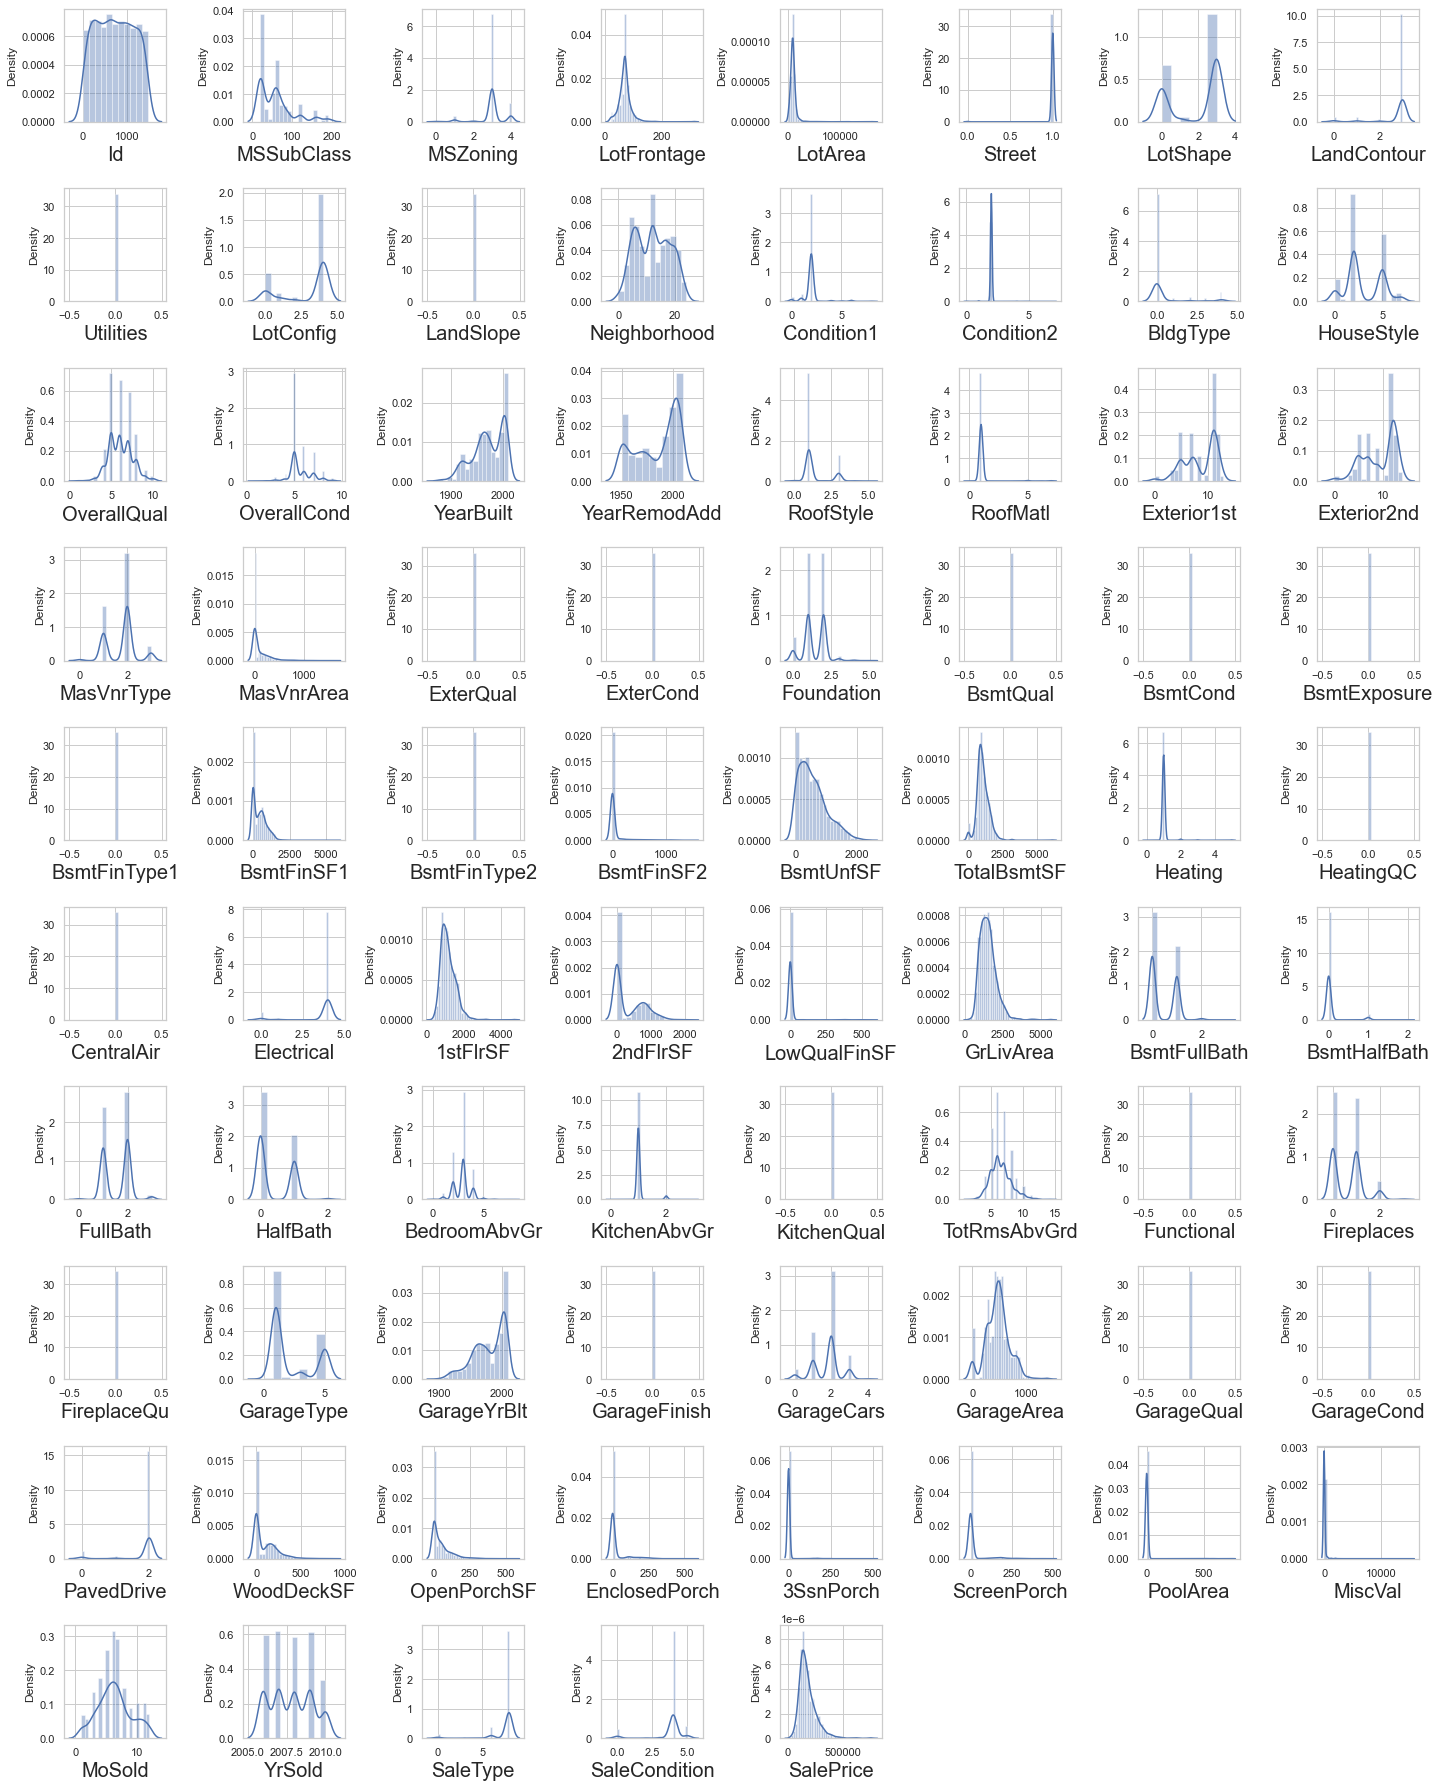

In [95]:
# Distribution of all the columns in the dataset:

# let us now see the distribution of the "Train dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_train:
    if plotnumber <=77:
        ax = plt.subplot(8,8, plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Correlation of the features with the dependent variable "SalesPrice"

In [114]:
corelation=abs(df_train.corr()['SalePrice']) >= 0.4
corelation[corelation==True]

OverallQual     True
YearBuilt       True
YearRemodAdd    True
MasVnrArea      True
TotalBsmtSF     True
1stFlrSF        True
GrLivArea       True
FullBath        True
TotRmsAbvGrd    True
Fireplaces      True
GarageCars      True
GarageArea      True
SalePrice       True
Name: SalePrice, dtype: bool

In [115]:
df_train=df_train[corelation.index[corelation]]
corelation=corelation.drop(['SalePrice'])
df_test=df_test[corelation.index[corelation]]

In [117]:
df_test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
0,9,2005,2006,200.0,1922,1922,1922,2,8,1,3,676
1,8,1984,1984,0.0,1220,1360,1360,1,4,1,2,565
2,8,2001,2001,0.0,1753,1788,1788,2,7,1,2,522
3,7,1941,1950,0.0,704,860,1564,1,7,1,1,234
4,6,2007,2007,74.0,894,894,1933,2,9,1,3,668


### Train-Test split:

In [126]:
# train dataset with featurs only
x = df_train.drop(columns = ["SalePrice"], axis=1)

y = df_train["SalePrice"]

# test dataset with featurs only
x1 = df_test

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled1 = scaler.fit_transform(x1)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

## Creating Models:

#### KNN

In [129]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.8643003104379634
Mean Absolute Error (MAE):  23744.676923076924
Mean Squared Error (MSE):  1688441073.2562962
Root Mean Squared Error (RMSE):  41090.64459528831


### DecisionTreeRegressor

In [130]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9999949254390876
Mean Absolute Error (MAE):  29578.811965811965
Mean Squared Error (MSE):  2062475577.2222223
Root Mean Squared Error (RMSE):  45414.48642473261


### RandomForestRegressor

In [131]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9756971968676988
Mean Absolute Error (MAE):  21830.18027730294
Mean Squared Error (MSE):  1560035694.0942047
Root Mean Squared Error (RMSE):  39497.28717385796


### ExtraTreesRegressor

In [132]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9999949254390876
Mean Absolute Error (MAE):  21995.66603988604
Mean Squared Error (MSE):  1426036354.5247543
Root Mean Squared Error (RMSE):  37762.896532506005


### Cross-validation

In [133]:

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: 0.696131368140551
Cross Validation score of DecisionTreeRegressor model is: 0.727306751561138
Cross Validation score of RandomForestRegressor model is: 0.8243606646421894
Cross Validation score of ExtraTreesRegressor model is: 0.8316932592995011


### Hyper Parameter Tuning


In [138]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rf_reg.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [139]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

### New-model

In [143]:
rf_reg_tuned = RandomForestRegressor(n_jobs=1 )
rf_reg_tuned.fit(x_train,y_train)
rf_reg_tuned_ypred = rf_reg_tuned.predict(x_test)
r2_score_rf_reg_tuned = r2_score(y_test,rf_reg_tuned_ypred)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9756971968676988
Mean Absolute Error (MAE):  21995.66603988604
Mean Squared Error (MSE):  1426036354.5247543
Root Mean Squared Error (RMSE):  37762.896532506005


# PCA 

In [145]:
import numpy as np
from sklearn.decomposition import PCA

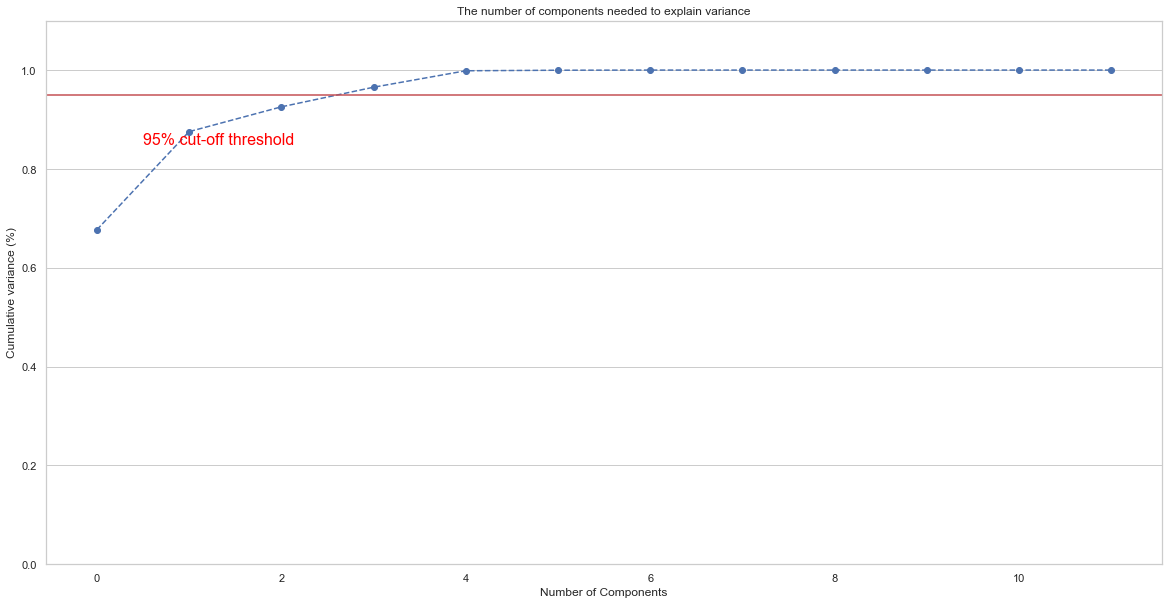

In [146]:
pca = PCA().fit(x)
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Saving the model


In [148]:
import joblib
joblib.dump(rf_reg_tuned,"Housing_Pred.pkl")

['Housing_Pred.pkl']

In [149]:
model = joblib.load("Housing_Pred.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,125872.00
1,179091.29
2,227934.90
3,194167.02
4,296656.02
...,...
346,136272.00
347,88883.50
348,329210.61
349,214246.00
